#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### CHAPTER 22
**CH22A How does a merger between airlines affect prices?**

 using the airline-tickets-usa dataset
 
 version 1.0 2021-05-05

In [183]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani.formatters import percent_format
import os
import sys
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
data_in = dirname + "da_data_repo/airline-tickets-usa/clean/"
data_out = dirname + "da_case_studies/ch22-airline-merger-prices/"
output = dirname + "da_case_studies/ch22-airline-merger-prices/output/"

func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions 
from py_helper_functions import *

# I.  Examining pre-treatment trends in avg ln price

workfile to identify treated and untreated markets

In [4]:
data_work = pd.read_csv(data_out + "ch22-airline-workfile.csv").query(
    "(balanced == 1 )& (year == 2011)"
)[["origin", "finaldest", "return", "treated", "smallmkt"]]

use year-quarter panel data and merge to it treated-untreated 

(keep matched ones; no unmatched from "using")

In [5]:
data = pd.read_stata(data_in + "originfinal-panel.dta")
data = pd.merge(data, data_work, on=["origin", "finaldest", "return"])

aggreagete data to create average price by treated-untreated and year-quarter and draw time series graphs of log avg price all markets

In [6]:
weighted_avg = lambda x: np.average(x, weights=data.loc[x.index, "passengers"])

In [7]:
data_agg = (
    data.groupby(["treated", "year", "quarter"])
    .agg(avgprice=("avgprice", weighted_avg))
    .reset_index()
)

data_agg["lnavgprice"] = np.log(data_agg["avgprice"])
data_agg["quarters"] = (
    data_agg["year"].astype(str) + " Q" + data_agg["quarter"].astype(str)
)
data_agg["date"] = pd.to_datetime(data_agg["quarters"].str.replace("\s+", "")).dt.to_period(
    "Q"
)

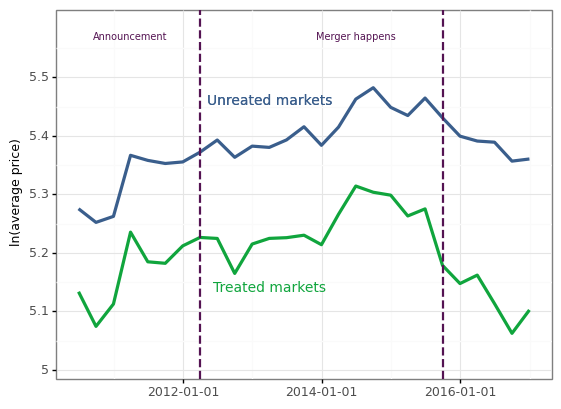

<ggplot: (301889874)>

In [8]:
ggplot(
    data_agg, aes(x="date", y="lnavgprice", color="treated", group="treated")
) + geom_line(size=1.3) + scale_color_manual(
    values=(color[0], color[1]), guide=False
) + scale_x_datetime(
    date_breaks="2 year"
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(5, 5.6), breaks=np.arange(5, 5.6, 0.1)
) + annotate(
    "text",
    x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
    y=5.14,
    label="Treated markets",
    size=10,
    color=color[1],
) + annotate(
    "text",
    x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
    y=5.46,
    label="Unreated markets",
    size=10,
    color=color[0],
) + geom_vline(
    xintercept=data_agg.loc[data_agg["quarters"] == "2012 Q1", "date"].values[0],
    color=color[2],
    size=0.9,
    linetype="dashed",
) + geom_vline(
    xintercept=data_agg.loc[data_agg["quarters"] == "2015 Q3", "date"].values[0],
    color=color[2],
    size=0.9,
    linetype="dashed",
) + annotate(
    "text",
    x=data_agg.loc[data_agg["quarters"] == "2011 Q1", "date"].values[0],
    y=5.57,
    label="Announcement",
    size=7,
    color=color[2],
) + annotate(
    "text",
    x=data_agg.loc[data_agg["quarters"] == "2014 Q2", "date"].values[0],
    y=5.57,
    label="Merger happens",
    size=7,
    color=color[2],
) + labs(
    y="ln(average price)", x=""
) + theme_bw() + theme(
    axis_text_x=element_text(size=9),
    axis_text_y=element_text(size=9),
    axis_title_x=element_text(size=9),
    axis_title_y=element_text(size=9),
)

**Small markets**

In [9]:
data_agg = (
    data.query("smallmkt == 1")
    .groupby(["treated", "year", "quarter"])
    .agg(avgprice=("avgprice", weighted_avg))
    .reset_index()
)

data_agg["lnavgprice"] = np.log(data_agg["avgprice"])
data_agg["quarters"] = (
    data_agg["year"].astype(str) + " Q" + data_agg["quarter"].astype(str)
)
data_agg["date"] = pd.to_datetime(
    data_agg["quarters"].str.replace("\s+", "")
).dt.to_period("Q")

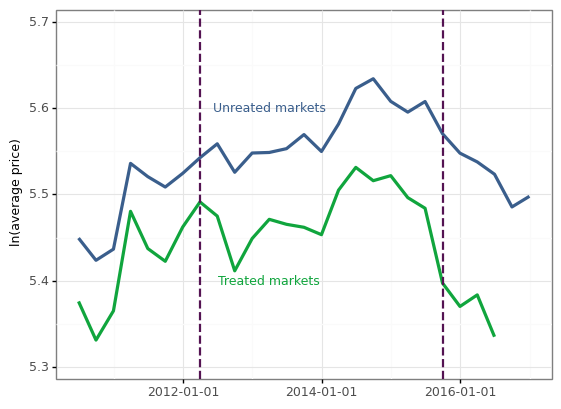

<ggplot: (309405178)>

In [19]:
ggplot(
    data_agg, aes(x="date", y="lnavgprice", color="treated", group="treated")
) + geom_line(size=1.3) + scale_color_manual(
    values=(color[0], color[1]), guide=False
) + scale_x_datetime(
    date_breaks="2 year"
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(5.3, 5.7), breaks=np.arange(5.3, 5.7, 0.1)
) + annotate(
    "text",
    x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
    y=5.4,
    label="Treated markets",
    size=9,
    color=color[1],
) + annotate(
    "text",
    x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
    y=5.6,
    label="Unreated markets",
    size=9,
    color=color[0],
) + geom_vline(
    xintercept=data_agg.loc[data_agg["quarters"] == "2012 Q1", "date"].values[0],
    color=color[2],
    size=0.9,
    linetype="dashed",
) + geom_vline(
    xintercept=data_agg.loc[data_agg["quarters"] == "2015 Q3", "date"].values[0],
    color=color[2],
    size=0.9,
    linetype="dashed",
) + labs(
    y="ln(average price)", x=""
) + theme_bw() + theme(
    axis_text_x=element_text(size=9),
    axis_text_y=element_text(size=9),
    axis_title_x=element_text(size=9),
    axis_title_y=element_text(size=9),
)

**Large markets**

In [20]:
data_agg = (
    data.query("smallmkt == 0")
    .groupby(["treated", "year", "quarter"])
    .agg(avgprice=("avgprice", weighted_avg))
    .reset_index()
)

data_agg["lnavgprice"] = np.log(data_agg["avgprice"])
data_agg["quarters"] = (
    data_agg["year"].astype(str) + " Q" + data_agg["quarter"].astype(str)
)
data_agg["date"] = pd.to_datetime(
    data_agg["quarters"].str.replace("\s+", "")
).dt.to_period("Q")

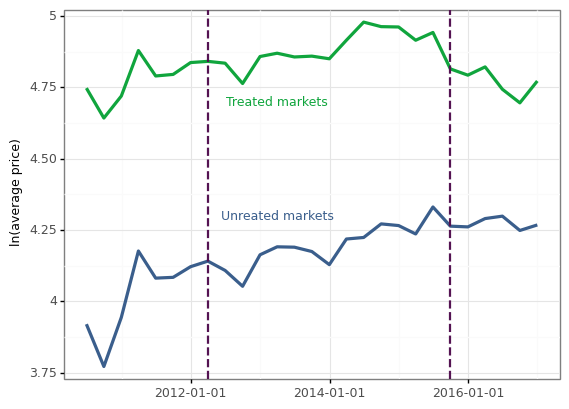

<ggplot: (309480611)>

In [29]:
ggplot(
    data_agg, aes(x="date", y="lnavgprice", color="treated", group="treated")
) + geom_line(size=1.3) + scale_color_manual(
    values=(color[0], color[1]), guide=False
) + scale_x_datetime(
    date_breaks="2 year"
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(3.75, 5), breaks=np.arange(3.5, 5.25, 0.25)
) + annotate(
    "text",
    x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
    y=4.7,
    label="Treated markets",
    size=9,
    color=color[1],
) + annotate(
    "text",
    x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
    y=4.3,
    label="Unreated markets",
    size=9,
    color=color[0],
) + geom_vline(
    xintercept=data_agg.loc[data_agg["quarters"] == "2012 Q1", "date"].values[0],
    color=color[2],
    size=0.9,
    linetype="dashed",
) + geom_vline(
    xintercept=data_agg.loc[data_agg["quarters"] == "2015 Q3", "date"].values[0],
    color=color[2],
    size=0.9,
    linetype="dashed",
) + labs(
    y="ln(average price)", x=""
) + theme_bw() + theme(
    axis_text_x=element_text(size=9),
    axis_text_y=element_text(size=9),
    axis_title_x=element_text(size=9),
    axis_title_y=element_text(size=9),
)

# II. ANALYSIS
**Basic diff-in-diffs regression, weighted by # passengers on market, in before period**

In [31]:
# reload main file
data_agg = pd.read_csv(data_out + "ch22-airline-workfile.csv")
# keep balanced
data_balanced = data_agg.query("balanced == 1")

In [98]:
fd = smf.wls(
    "d_lnavgp ~ treated", data_balanced, weights=data_balanced["pass_bef"]
).fit(cov_type="HC0")
fd_small = smf.wls(
    "d_lnavgp ~ treated",
    data_balanced.query("smallmkt == 1"),
    weights=data_balanced.query("smallmkt == 1")["pass_bef"],
).fit(cov_type="HC0")
fd_large = smf.wls(
    "d_lnavgp ~ treated",
    data_balanced.query("smallmkt == 0"),
    weights=data_balanced.query("smallmkt == 0")["pass_bef"],
).fit(cov_type="HC0")

In [99]:
stargazer = Stargazer([fd, fd_small, fd_large])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["All markest", "Small markets", "Large markets"], [1, 1, 1])
HTML(stargazer.render_html())

In [72]:
# Corresponding diff-in-diffs table
weighted_avg = lambda x: np.average(
    x,
    weights=data_balanced.loc[data_balanced["lnavgp"].notnull()].loc[
        x.index, "pass_bef"
    ],
)
data_balanced.loc[data_balanced["lnavgp"].notnull()].groupby(["after", "treated"]).agg(
    avgprice=("lnavgp", weighted_avg), n=("lnavgp", "count")
)

avgprice       n
after treated                  
0     False    4.926512  101275
      True     4.962715   11629
1     False    5.082928  101144
      True     4.939714   11628

**Diff-in-diffs regerssion with confounder variables weighted by # passengers on market, in before period**

In [94]:
def functions_for_groupby(df):
    d = {}
    d["lnpass_bef"] = np.nanmean(
        np.where(df["before"] == 1, np.log(df["passengers"]), np.nan)
    )
    d["share_bef"] = np.nanmean(
        np.where(df["before"] == 1, df["shareAA"] + df["shareUS"], np.nan)
    )
    d["sharelarge_bef"] = np.nanmean(
        np.where(df["before"] == 1, df["sharelargest"], np.nan)
    )
    return pd.Series(d, index=["lnpass_bef", "share_bef", "sharelarge_bef"])

In [ ]:
# This groupby is incredibly slow

In [96]:
%%time
data_balanced = data_balanced.merge(
    data_balanced.groupby("market").apply(functions_for_groupby).reset_index(), on="market"
)

CPU times: user 4min 18s, sys: 6.86 s, total: 4min 25s
Wall time: 4min 49s


In [113]:
data_balanced = data_balanced.rename(columns={"return":"return_"})

In [115]:
formula2 = "d_lnavgp ~ treated + lnpass_bef + return_ + stops + sharelarge_bef"

fd2 = smf.wls(
    formula2, data_balanced, weights=data_balanced["pass_bef"]
).fit(cov_type="HC1")
fd2_small = smf.wls(
    formula2,
    data_balanced.query("smallmkt == 1"),
    weights=data_balanced.query("smallmkt == 1")["pass_bef"],
).fit(cov_type="HC0")
fd2_large = smf.wls(
    formula2,
    data_balanced.query("smallmkt == 0"),
    weights=data_balanced.query("smallmkt == 0")["pass_bef"],
).fit(cov_type="HC0")

In [116]:
stargazer = Stargazer([fd2, fd2_small, fd2_large])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["All markest", "Small markets", "Large markets"], [1, 1, 1])
HTML(stargazer.render_html())

**Diff-in-diffs regerssion with quantitative treatment weighted by # passengers on market, in before period**

In [137]:
share_bef_1 = np.where(data_balanced.query("before == 1")["share_bef"] == 1, 1, 0)
share_bef_0 = np.where(data_balanced.query("before == 1")["share_bef"] == 0, 1, 0)

In [147]:
data_balanced.query("before == 1").groupby([share_bef_0, share_bef_1]).agg(
    sum=("passengers", sum), mean=("passengers", "mean"), n=("passengers", "count")
) #bit different form R

sum        mean      n
0 0  20169827.0  542.170502  37202
  1     33656.0    8.948684   3761
1 0   3746736.0   51.977360  72084

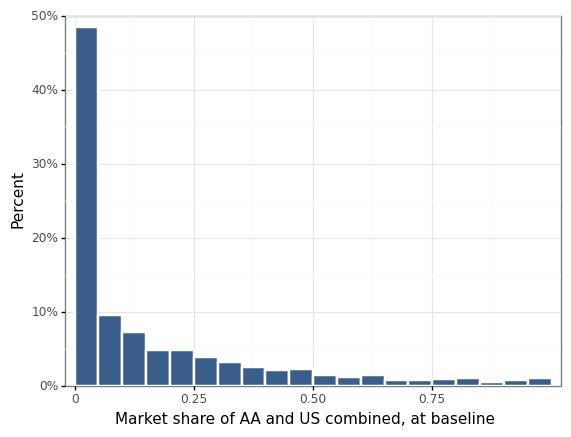

<ggplot: (310802710)>

In [184]:
ggplot(
    data_balanced, aes(x="share_bef", y="stat(width*density)", weight="pass_bef")
) + geom_histogram(
    binwidth=0.05,
    boundary=0,
    fill=color[0],
    alpha=0.8,
    colour="white",
    size=1,
    show_legend=False,
) + labs(
    x="Market share of AA and US combined, at baseline", y="Percent"
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 1), breaks=np.arange(0, 1, 0.25)
) + scale_y_continuous(
    expand=(0.0, 0.0),
    limits=(0, 0.5),
    breaks=np.arange(0, 0.51, 0.1),
    labels=percent_format(),
) + theme_bw()

In [194]:
formula3 = "d_lnavgp ~ share_bef + lnpass_bef + return_ + stops + sharelarge_bef"
fd3 = smf.wls(formula3, data_balanced, weights=data_balanced["pass_bef"]).fit(
    cov_type="HC0"
)
fd3_small = smf.wls(
    formula3,
    data_balanced.query("smallmkt == 1"),
    weights=data_balanced.query("smallmkt == 1")["pass_bef"],
).fit(cov_type="HC0")
fd3_large = smf.wls(
    formula3,
    data_balanced.query("smallmkt == 0"),
    weights=data_balanced.query("smallmkt == 0")["pass_bef"],
).fit(cov_type="HC0")

In [195]:
stargazer = Stargazer([fd3, fd3_small, fd3_large])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["All markest", "Small markets", "Large markets"], [1, 1, 1])
HTML(stargazer.render_html())

**Diff-in-diffs on pooled cross-sections regeression**
* use entire unbalanced panel
* errr... after only is dropped here see later
* weighted by # passengers on market, in before period

In [196]:
def functions_for_groupby(df):
    d = {}
    d["lnpass_bef"] = np.nanmean(
        np.where(df["before"] == 1, np.log(df["passengers"]), np.nan)
    )
    d["sharelarge_bef"] = np.nanmean(
        np.where(df["before"] == 1, df["sharelargest"], np.nan)
    )
    return pd.Series(d, index=["lnpass_bef", "sharelarge_bef"])

In [197]:
%%time
data_agg = data_agg.merge(
    data_agg.groupby("market").apply(functions_for_groupby).reset_index(), on="market"
)

CPU times: user 5min 17s, sys: 11.8 s, total: 5min 29s
Wall time: 6min 43s


In [201]:
data_agg.groupby(["balanced", "before"]).agg({"passengers": ["sum", "count"]})

passengers        
                        sum   count
balanced before                    
False    0         457978.0   22851
         1         103082.0   28665
True     0       30186202.0  113047
         1       23950219.0  113047

In [204]:
# treatment group defined if observed before only or both before and after

In [202]:
def functions_for_groupby(df):
    d = {}
    d["treatment"] = np.nanmean(np.where(df["before"] == 1, df["AA_and_US"], np.nan))
    return pd.Series(d, index=["treatment"])

In [203]:
%%time
data_agg = data_agg.merge(
    data_agg.groupby("market").apply(functions_for_groupby).reset_index(), on="market"
)

CPU times: user 3min 34s, sys: 8.99 s, total: 3min 43s
Wall time: 4min 26s


In [227]:
data_agg["treatment_isna"] = data_agg["treatment"].isna()
data_agg.groupby(["treatment_isna", "balanced"]).agg({"passengers": ["sum", "count"]})

passengers        
                                sum   count
treatment_isna balanced                    
False          False       103082.0   28665
               True      54136421.0  226094
True           False       457978.0   22851

In [228]:
data_agg = data_agg.rename(columns={"return": "return_"})

In [229]:
# conditioning on observed confounders
formula4 = "lnavgp ~ (treatment + lnpass_bef + return_ + stops + sharelarge_bef)*after"

fd4 = smf.wls(formula4, data_agg, weights=data_agg["pass_bef"]).fit(cov_type="HC0")
fd4_small = smf.wls(
    formula4,
    data_agg.query("smallmkt == 1"),
    weights=data_agg.query("smallmkt == 1")["pass_bef"],
).fit(cov_type="HC0")
fd4_large = smf.wls(
    formula4,
    data_agg.query("smallmkt == 0"),
    weights=data_agg.query("smallmkt == 0")["pass_bef"],
).fit(cov_type="HC0")

In [230]:
stargazer = Stargazer([fd4, fd4_small, fd4_large])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["All markest", "Small markets", "Large markets"], [1, 1, 1])
HTML(stargazer.render_html())